### Master of Applied Artificial Intelligence

**Course: TC4033 - Computational Vision for Images and Video**

<img src="./../assets/logo.png" alt="Image Alt Text" width="500"/>

**Image enhancement algorithms using Morphological Operations**

Tutor: Dr. Gilberto Ochoa


Team members:
* Alfonso de Lucas Espinosa - A01795118
* Ignacio Jose Aguilar Garcia - A00819762
* Alejandro Calderon Aguilar - A01795353
* Ricardo Mar Cupido - A01795394
* Mario Fonseca Martinez - A01795228


### Introduction

#### Mathematical Morphology
Tool for extracting image components that are useful in the representation and description of region shape [1].

There are morphological techniques for pre- or postprocessing images, such as morphological filtering, thinning, and prunning.

It is important to make mention that our inputs would be images and outputs images, whose outputs are **image attributes**, for tasks such as **object extraction** and **description**.

As we mention before, the Morphology is a tool that can help us in tasks suchs as:
* Image segmentation.
* Feature extraction.
* Object recognition.

that fom the foundation of techniques for extracting "meaning" from an image.


#### Binary Images
Two compoenntes of of each elements of the set refers to the coordinates of a pixel, and the third corresponds to is discret intensity value. Sets in higher dimensional spaces can contain other image attributes, such as color and time-varying components.

Morphological operations are defined in terms of sets.

Morphology is used with two types of sets of pixels:
* Objects: defined as sets of foreground pixels.
* Structuring elements (SE's): specified in terms of both foreground and background prixels, in SE we can have elements called "don't care" which it means that the elements doesn't matter, the value can be ignored, or it can be made to fit a desired value (Structuring elements are used in a form similar to spatial convolution kernels).

<img src="./data/The-foreground-and-the-background-pixels-of-each-edge-component.jpg" alt="Image Alt Text" width="250"/>


The concept of set reflection and translation are used extensively in morphology in connection with SE's.



In this lab we are going to focus in tools used for binary image morphology, including:
* Erosion.
* Dilation.
* Opening.
* Closinng.


with the used of these algorithms in binary image morphology, it can perfom task such as:
* Morphological smoothing.
* Edge detection.
* Extracting connected components.
* Skeletonizing.

It also can be applied algorithms for grayscale image processing for tasks such as:
* Textural segmentation.
* Granulometry.
* Computing gray-scale image gradients.






### Importing libraries

In [1]:
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

### Loading Images

In [2]:
# Loading images
thrombosis_image = cv2.imread("data/thrombosis.jpg")
thrombosis_image = cv2.cvtColor(thrombosis_image,cv2.COLOR_BGR2GRAY)
pet_image = cv2.imread("data/pet_image.png")
pet_image = cv2.cvtColor(pet_image, cv2.COLOR_BGR2GRAY)
fingerprint = cv2.imread("data/fingerprint.png")
fingerprint_image = cv2.cvtColor(fingerprint, cv2.COLOR_BGR2GRAY)
pcb2_image = cv2.imread("data/pcb2.png")
pcb2_image = cv2.cvtColor(pcb2_image, cv2.COLOR_BGR2GRAY)


In [3]:
def plot_images(images=[], labels=[], nrows=1, ncols=2, figsize=(12,8), cmap="gray"):
    """
    Plots a list of images in a grid layout using Matplotlib.

    Parameters:
    images (list): List of images to be plotted.
    labels (list): List of labels for each image. Default is an empty list.
    nrows (int): Number of rows in the grid. Default is 1.
    ncols (int): Number of columns in the grid. Default is 2.
    figsize (tuple): Size of the figure in inches. Default is (12, 8).
    cmap (str): Colormap to be used for displaying the images. Default is "gray".

    Returns:
    None
    """

    # set the subplots
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)
    # Iterate over each axis defined in M*N as flat
    for i, ax in enumerate(axs.flat):
        # validates that the dimensions of axs fits with images array parameter
        if i < len(images):
            # plot the image
            ax.imshow(images[i], cmap=cmap)
            # if there are labels defined then set a title
            if len(labels) > 0:
                ax.set_title(labels[i])
            # dont show the axis ticks
            ax.axis("off")
        else:
            # dont show an empty plot
            ax.axis("off")
    # fits the plots
    plt.tight_layout()
    plt.show()


### 1. Application of Erosion in Image Processing

Morphological erosion is particularly useful for removing thin lines or small bright spots within an image, effectively “chipping away” at object boundaries so that only the most substantial regions remain (MathWorks, n.d.).

<img src="./data/erosion.png" width="250"/>

This operation is often paired with dilation to refine shapes or clean up noise, as both are fundamental morphological transformations (Ravjot Singh, 2020). Erosion works by sliding a structuring element (kernel) across the image and, in a binary context, setting a pixel to `0` if **any** pixel under that kernel is `0`. In a grayscale context, it assigns the center pixel the **minimum intensity** value found in the kernel’s neighborhood.

#### Input Image
Original binary (or grayscale) image that contains the object you wish to shrink or clean up.

<img src="./data/input_erosion.png" width="250" alt="Input Image (original binary or grayscale)"/>

#### Structuring Element
The structuring element (kernel) is a small matrix that slides across the input image.

<img src="./data/structuring_erosion.png" width="250" alt="Structuring Element"/>

#### Output Image
Result of the operation, illustrating that the object’s boundary has contracted.

<img src="./data/output_erosion.png" width="250" alt="Output Image (after erosion)"/>

In other words, if **any** pixel in the neighborhood is `0`, the center pixel in the output is set to `0`. As a result, boundary pixels that do not fully match the structuring element are “eroded away.”

<img src="./data/erosion_formula.png" width="550" alt="Erosion Formula"/>

Erosion is useful for removing small blobs in an image or disconnecting two connected objects. As we see in the images below, as the number of erosions increases, the image will continue to “erode” until it can disappear.

<img src="./data/logo_erosion.png" width="250" alt="Erosion applied multiple times on text"/>


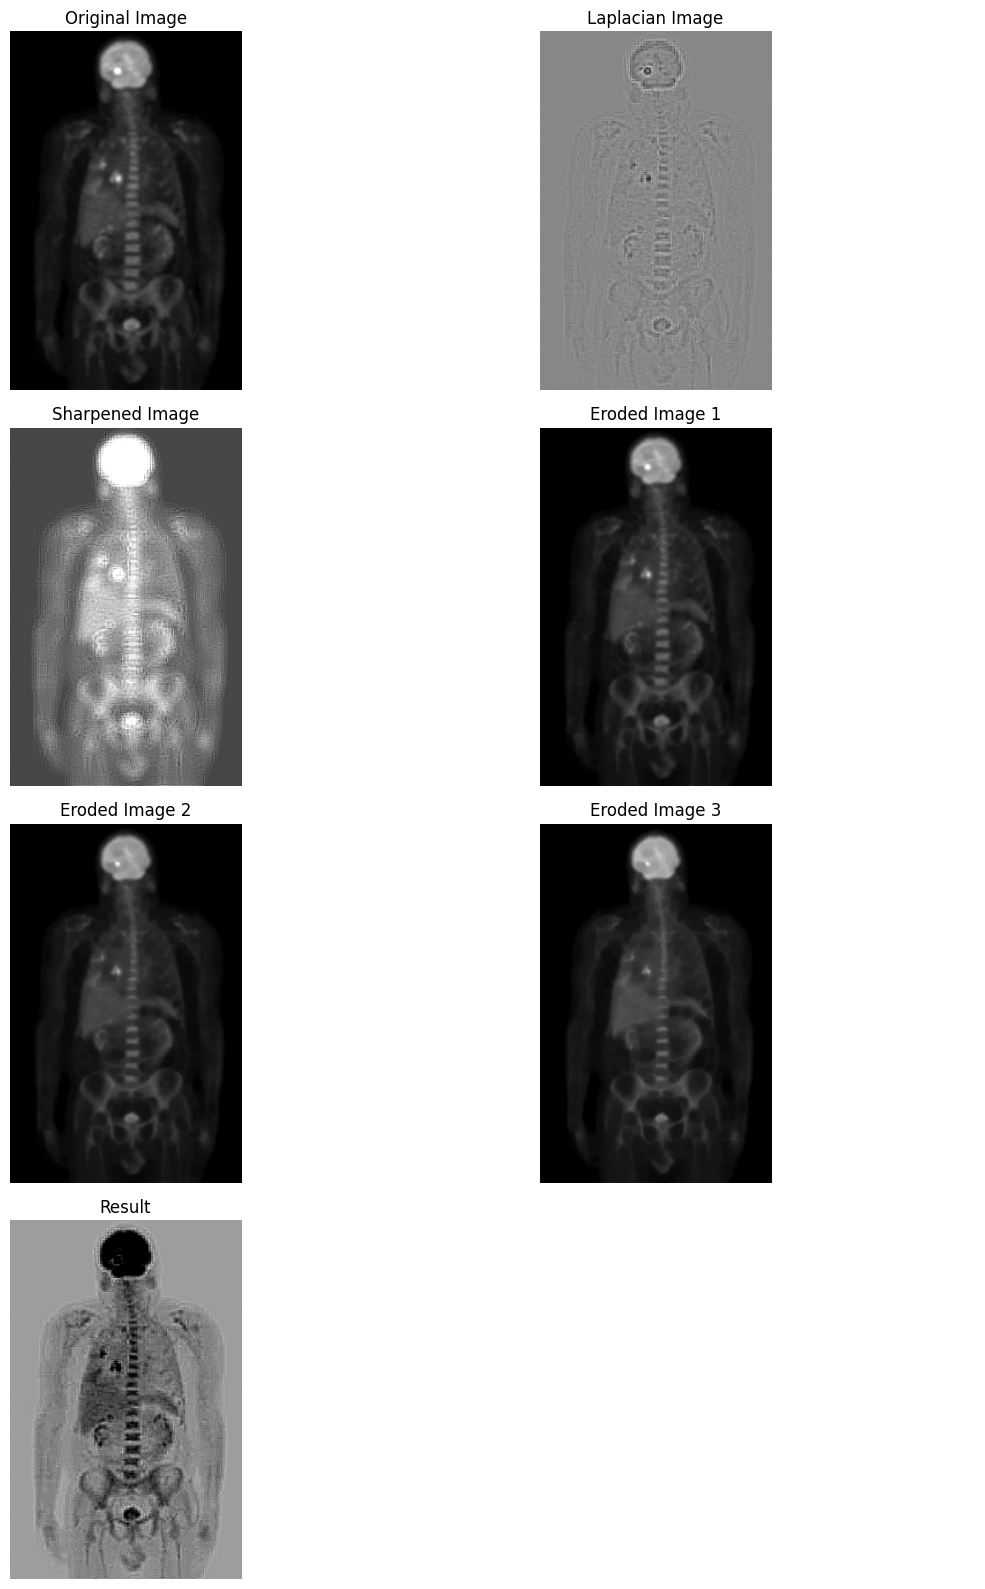

In [4]:
# Apply Gaussian Blur to the pet image
gaussian_image = cv2.GaussianBlur(pet_image, (3, 3), 0.1)

# Apply Laplacian filter to the blurred image to detect edges
laplacian_image = cv2.Laplacian(gaussian_image, cv2.CV_64F, ksize=3)

# Normalize the Laplacian image to the range [0, 255]
laplacian_image = cv2.normalize(laplacian_image, None, 0, 255, cv2.NORM_MINMAX)
laplacian_image = np.uint8(laplacian_image)

# Define a sharpening kernel
sharpening_kernel = np.array([[ 0, -1,  0],
                              [-1,  5, -1],
                              [ 0, -1,  0]])

# Sharpen the image by adding the Laplacian image to the original image
shapened_image = cv2.add(pet_image, laplacian_image)
sharpened_image = cv2.filter2D(shapened_image, -1, sharpening_kernel)

# Apply Otsu's thresholding to the pet image
ret, thr_image = cv2.threshold(pet_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Initialize a list to store eroded images
eroded_images = []

# Define a kernel for erosion
kernel = np.ones((3, 3), np.uint8)

# Apply erosion with increasing iterations and store the results
for i in range(3):
    eroded = cv2.erode(pet_image.copy(), kernel=kernel, iterations=i+1)
    eroded_images.append(eroded)

# Subtract the second eroded image from the Laplacian image
result = cv2.subtract(laplacian_image, eroded_images[1])

# Plot the original, Laplacian, sharpened, eroded images, and the result
plot_images([pet_image, laplacian_image, shapened_image] + eroded_images + [result], 
            labels=['Original Image', 'Laplacian Image', 'Sharpened Image', 'Eroded Image 1', 'Eroded Image 2', 'Eroded Image 3', 'Result'], 
            nrows=4, ncols=2, figsize=(12, 16))


### 2. Application of Dilation in Image Processing

Mathworks (n.d), mentions that one of the most basic morphological operations is dilation.

Dilation adds pixels to the boundaries of objects in an image, while erosion removes pixels on object boundaries. The number of pixels added or removed from the objects in an image depends on the size and shape of the structuring element used to process the image.

In the morphological dilation operation, the value of the output pixel is the maximum value of all pixels in the input pixel's neighborhood. In a binary image, a pixel is set to 1 if any of the neighboring pixels have the value 1.

Morphological dilation makes objects more visible and fills in small holes in objects. Lines appear thicker, and filled shapes appear larger.

<img src="https://www.mathworks.com/help/images/morph_dilate.png" width="250"/>

#### Morphological Dilation on Binary Images

In binary images, dilation adds pixels to the boundaries of objects in an image. The number of pixels added to the objects in an image depends on the size and shape of the structuring element used to process the image (Mathworks, n.d.). 

<img src="https://www.mathworks.com/help/images/morph21.gif" width="250"/>

#### Morphological Dilation on Grayscale Images

In grayscale images, dilation replaces the center pixel value with the maximum pixel value in the neighborhood defined by the structuring element. The size of the neighborhood is defined by the structuring element. The structuring element is a matrix with a defined center that is used to determine the neighborhood of the center pixel (Mathworks, n.d.).

<img src="https://www.mathworks.com/help/images/morph6.gif" width="250"/>


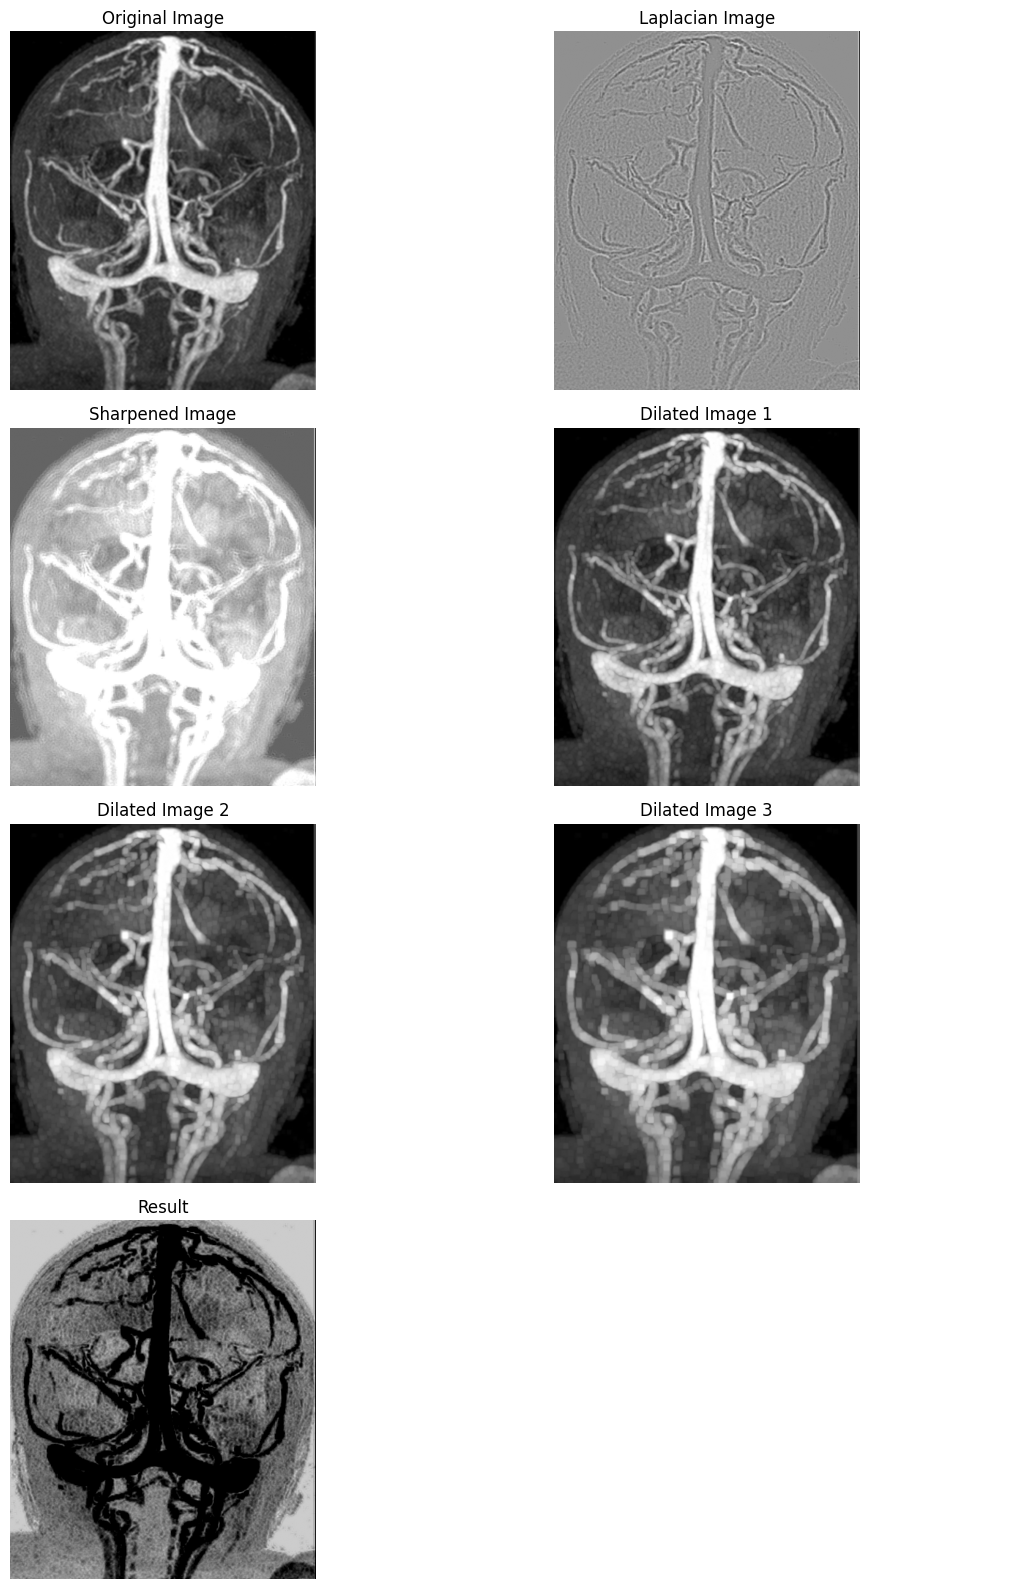

In [5]:
# Apply Gaussian Blur to the thrombosis image
gaussian_image = cv2.GaussianBlur(thrombosis_image, (3, 3), 0.1)

# Apply Laplacian filter to the blurred image to detect edges
laplacian_image = cv2.Laplacian(gaussian_image, cv2.CV_64F, ksize=3)

# Normalize the Laplacian image to the range [0, 255]
laplacian_image = cv2.normalize(laplacian_image, None, 0, 255, cv2.NORM_MINMAX)
laplacian_image = np.uint8(laplacian_image)

# Define a sharpening kernel
sharpening_kernel = np.array([[ 0, -1,  0],
                              [-1,  5, -1],
                              [ 0, -1,  0]])

# Sharpen the image by adding the Laplacian image to the original image
shapened_image = cv2.add(thrombosis_image, laplacian_image)
sharpened_image = cv2.filter2D(shapened_image, -1, sharpening_kernel)

# Apply Otsu's thresholding to the thrombosis image
ret, thr_image = cv2.threshold(thrombosis_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Initialize a list to store dilated images
dilated_images = []

# Define a kernel for dilation
dilation_kernel = np.ones((3, 3), np.uint8)

# Apply morphological dilation
for i in range(3):
    morphological_dilated_image = cv2.dilate(thrombosis_image, dilation_kernel, iterations=i+1)
    dilated_images.append(morphological_dilated_image)

# Subtract the second dilated image from the Laplacian image
result = cv2.subtract(laplacian_image, dilated_images[1])

# Plot the original, Laplacian, sharpened, dilated images, and the result
plot_images([thrombosis_image, laplacian_image, shapened_image] + dilated_images + [result], 
            labels=['Original Image', 'Laplacian Image', 'Sharpened Image', 'Dilated Image 1', 'Dilated Image 2', 'Dilated Image 3', 'Result'], 
            nrows=4, ncols=2, figsize=(12, 16))


### 3.Application of Opening and Closing Image Processing
Mat Said, Jambek, and Sulaiman (2016) mention that opening and closing are morphological operations used to remove noise and small objects from images while preserving the size and shape of larger objects.

#### Opening
An **opening** is performed by first **eroding** the image (removing small blobs or noise) and then **dilating** it (regrowing the main object to its approximate original size). By design, opening helps eliminate tiny artifacts while preserving the general shape of larger objects.

<img src="./data/opening.png" width="250" alt="Erosion applied multiple times on text"/>

- **Removes small foreground objects/noise**: Erosion can “chip away” thin protrusions or isolated pixels.  
- **Preserves overall shape**: The subsequent dilation “regains” much of the original form, so only minor objects get removed.  
- **Kernel Size Matters**: Increasing the kernel size can remove larger blobs, but may also cause important parts of the object to shrink or vanish.  

#### Closing
**Closing** is a dilation followed by an erosion. It removes small holes from an image while preserving the shape and size of the objects. Closing can also close small gaps in the contour of an object. It can help with:

<img src="./data/closing.png" width="250" alt="Erosion applied multiple times on text"/>

- **Close small holes** in objects.
- **Connect nearby objects** by bridging minor gaps.

#### Compound Operations

If you add random white blobs (“noise”) to a logo, applying an opening will progressively remove these small dots. However, if the kernel is too large, it can remove or thin important parts of the text or object as well

<img src="./data/Compound_Operations.png" width="450" alt="Erosion applied multiple times on text"/>

Most morphological operations that you’ll use in practical applications are compound:

Opening (erosion → dilation)
Closing (dilation → erosion)
As shown above, opening tends to eliminate small, isolated “noise” or extrusions, while closing connects or fills small gaps/holes. The choice depends on whether your ultimate goal is to remove small features (opening) or add/join features (closing).


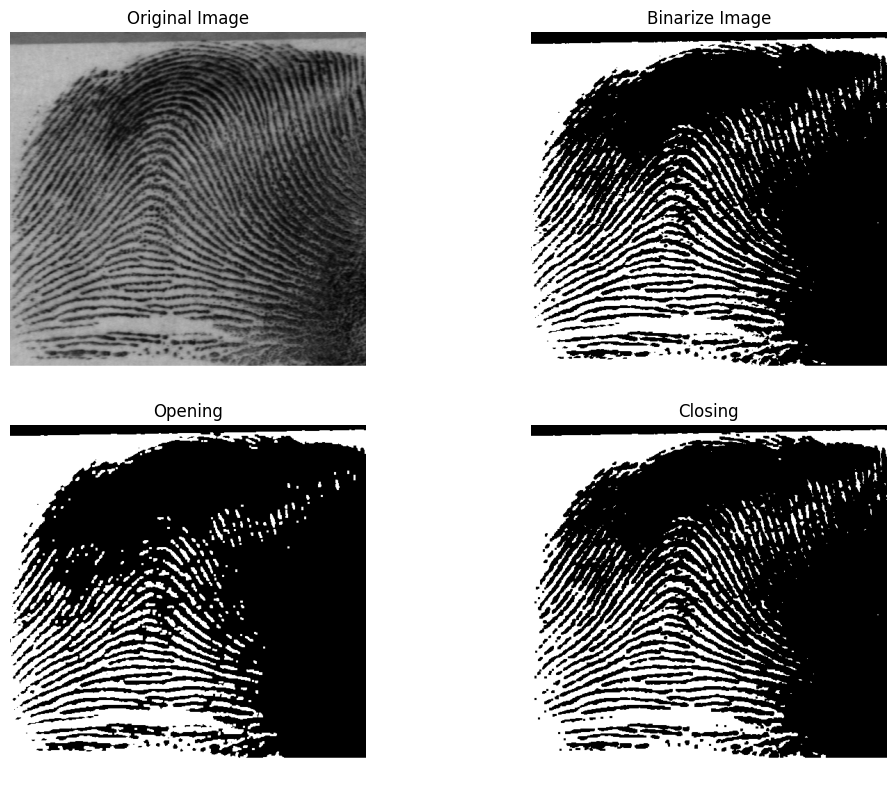

In [6]:
# Opening - Closing
# Defining a kernel for both (opening and closing)
kernel = np.ones((4, 4), np.uint8)

binarize_image = cv2.threshold(fingerprint_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
# kernel = np.ones((3,3), np.uint8)
# MORPH_RECT
# MORPH_ELLIPSE
# MORPH_CROSS
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

# Applying opening method
opening = cv2.morphologyEx(binarize_image, cv2.MORPH_OPEN, kernel)

# Applying closing method
closing = cv2.morphologyEx(binarize_image, cv2.MORPH_CLOSE, kernel)

# Showing images
plot_images([fingerprint_image, binarize_image, opening, closing], labels=["Original Image","Binarize Image", "Opening", "Closing"], nrows=2, ncols=2)

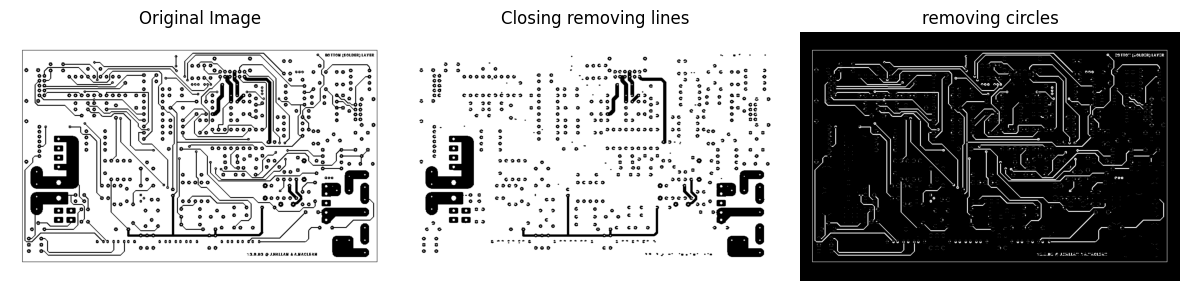

In [7]:
binarize_image = cv2.threshold(pcb2_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
# kernel = np.ones((3,3), np.uint8)
# MORPH_RECT
# MORPH_ELLIPSE
# MORPH_CROSS
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))

# Applying opening method
closing = cv2.morphologyEx(binarize_image, cv2.MORPH_CLOSE, kernel, iterations=1)
# cv2.morphologyEx(src, op, kernel, dst=None, anchor=(-1, -1), iterations=1, borderType=cv2.BORDER_CONSTANT, borderValue=0)

final = cv2.subtract( closing, binarize_image)

plot_images([binarize_image, closing, final], labels=["Original Image", "Closing removing lines", "removing circles"], ncols=3)

* **Opening** will remove small specks or ridges from the fingerprint, potentially making the main lines clearer.

* **Closing** may help fill any breaks in the main fingerprint ridges, connecting them to form continuous patterns.

### Conclusion
In this practice we applied knowledge for us to start coding and fix images using techniches like Dilation, Erotion and using also the Opening and Closing to upgrade the images

- **Dilation** :
     - Thickens or enlarges bright structures, making white regions more prominent.
     - In the example of the head scan, each successive dilation makes the highlighted vascular structures more pronounced, ultimately enhancing edges in the “Result” image.  
 - **Erosion** :
     - Gradually thins out bright objects and removes minor bright spots at the edges.
     - In the PET scan example, each erosion iteration causes the boundaries of the organs/bones to recede, removing small-scale noise but potentially losing some fine details.  
- **Opening** (erosion → dilation):
     - Removes small noise or speckles between fingerprint ridges.  
     - The “Opening” image shows fewer white specks outside and between the lines, leading to a cleaner pattern overall.
     - However, if the structuring element or the number of iterations is too large, fine ridge details might be lost.
- **Closing** (dilation → erosion):
     - Fills small holes or gaps in the ridges, making them appear more continuous.
     - The “Closing” image demonstrates how the ridges become more solid, though applying it too aggressively can cause neighboring ridges to merge.

By combining these techniques, one can tackle diverse tasks such as removing small blobs of noise, closing gaps in objects, or improving the accuracy of segmentation and feature extraction. Effective use of erosion, dilation, opening, and closing often depends on choosing an appropriate structuring element (kernel) size and shape, which may vary from rectangular to elliptical or cross-shaped, depending on the specific application.

Overall, **morphological operations** (erosion, dilation, opening, and closing) are highly adaptable for tasks such as **noise reduction, feature enhancement, and object boundary refinement**. By carefully tuning parameters (kernel size, shape, and iteration count) and possibly combining them with other image processing filters, one can achieve optimal results for a range of medical or forensic imaging applications.

### References

* Chandran, S. (n.d.). Understanding morphological image processing and its operations. Medium: Towards Data Science. https://medium.com/towards-data-science/understanding-morphological-image-processing-and-its-operations-7bcf1ed11756

* MathWorks. (n.d.). Morphological dilation and erosion.https://www.mathworks.com/help/images/morphological-dilation-and-erosion.html#f18-13322

* Mat Said, K. A., Jambek, A., & Sulaiman, N. (2016). A study of image processing using morphological opening and closing processes. International Journal of Control Theory and Applications, 9(15), 15-21.

* Morphology - closing. (n.d.). https://homepages.inf.ed.ac.uk/rbf/HIPR2/close.htm

* OpenCV. (n.d.). Morphological operations (tutorial_py_morphological_ops). https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html

* Python Software Foundation. (n.d.). Python Enhancement Proposals (PEPs). https://peps.python.org

* Ravjot Singh. (2020). Morphological transformations of images using OpenCV - Image processing (Part 2). Medium. https://medium.com/analytics-vidhya/morphological-transformations-of-images-using-opencv-image-processing-part-2-f64b14af2a38

* Rosebrock, A. (2021, April 28). OpenCV morphological operations. PyImageSearch. https://pyimagesearch.com/2021/04/28/opencv-morphological-operations/


